In [2]:
import pyarrow.parquet as pq
import numpy as np
import pandas as pd
import pyarrow as pa
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
import pathlib
pathlib.Path().absolute()

WindowsPath('C:/Users/issam/Downloads/Final Assignment mlim 4')

In [3]:
baskets = pd.read_parquet('C:/Users/issam/Downloads/Final Assignment mlim 4/baskets.parquet')

In [4]:
coupons = pd.read_parquet('C:/Users/issam/Downloads/Final Assignment mlim 4/coupons.parquet')

In [ ]:
# coup_index = pd.read_parquet('C:/Users/issam/Downloads/Final Assignment mlim 4/coupon_index.parquet')

In [5]:
print(f"Dimensionality of the baskets data is {baskets.shape}")
print('Dimensionality of the coupons data is {}'.format(coupons.shape))
print(' ')
print('The total number of elements of baskets is {}.'.format(baskets.size))
print('The total number of elements of coupons is {}.'.format(coupons.size))

Dimensionality of the baskets data is (68841598, 4)
Dimensionality of the coupons data is (45000000, 4)
 
The total number of elements of baskets is 275366392.
The total number of elements of coupons is 180000000.


In [ ]:
# try the f string

In [6]:
baskets.tail(20)

,week,shopper,product,price
68841578,89,99997,142,551
68841579,89,99997,175,692
68841580,89,99997,214,505
68841581,89,99997,229,643
68841582,89,99998,6,568
68841583,89,99998,42,527
68841584,89,99998,64,575
68841585,89,99998,122,660
68841586,89,99998,165,550
68841587,89,99998,205,419


In [7]:
print('We have {} shoppers in the data set'.format(baskets['shopper'].nunique()))
print('We have {} products in the data set'.format(baskets['product'].nunique()))

We have 100000 shoppers in the data set
We have 250 products in the data set


In [8]:
# what about reduced shoppers?

In [9]:
df_b = baskets[baskets.shopper==12]
df_c = coupons[coupons.shopper==12]

In [10]:
df_b.nunique()

week       90
shopper     1
product    60
price      71
dtype: int64

In [11]:
df_c.nunique()

week         90
shopper       1
product     212
discount      7
dtype: int64

In [12]:
#are the product in both files are different or the same?

In [13]:
df_c

,week,shopper,product,discount
60,0,12,247,30
61,0,12,141,10
62,0,12,224,15
63,0,12,64,35
64,0,12,71,10
...,...,...,...,...
44500060,89,12,106,15
44500061,89,12,207,15
44500062,89,12,60,25
44500063,89,12,42,40


In [14]:
full_df = (df_b
           .merge(
               df_c, 
               on=['week', 'shopper', 'product'], 
               how='outer',
               indicator=True
           )
           .sort_values(by=['week', 'product'])
           .reset_index(drop=True)
           .replace(['left_only', 'right_only', 'both'], ['RRP', 'coupon', 'discounted'])
           .rename(columns={'_merge': 'status'})
          )


In [15]:
full_df

,week,shopper,product,price,discount,status
0,0,12,4,620.0,NaN,RRP
1,0,12,64,NaN,35.0,coupon
2,0,12,67,637.0,NaN,RRP
3,0,12,71,NaN,10.0,coupon
4,0,12,141,NaN,10.0,coupon
...,...,...,...,...,...,...
1153,89,12,130,613.0,NaN,RRP
1154,89,12,143,470.0,NaN,RRP
1155,89,12,188,527.0,NaN,RRP
1156,89,12,205,419.0,NaN,RRP


In [16]:
full_df.status.value_counts()

RRP           708
coupon        428
discounted     22
Name: status, dtype: int64

In [17]:
full_df.discount.value_counts()

25.0    68
35.0    68
20.0    66
30.0    65
10.0    63
40.0    62
15.0    58
Name: discount, dtype: int64

In [18]:
full_df.groupby("status")["discount"].value_counts()

status      discount
coupon      35.0        66
            20.0        64
            25.0        64
            30.0        62
            10.0        60
            15.0        56
            40.0        56
discounted  40.0         6
            25.0         4
            10.0         3
            30.0         3
            15.0         2
            20.0         2
            35.0         2
Name: discount, dtype: int64

<AxesSubplot:xlabel='count', ylabel='product'>

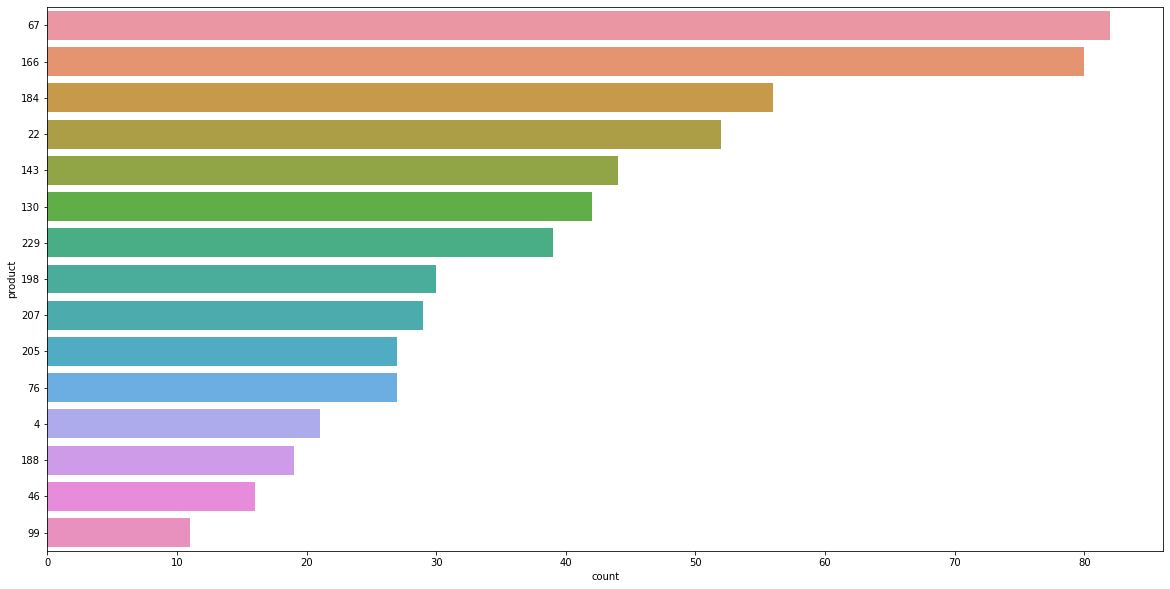

In [23]:
plt.figure(figsize = (20, 10))

sns.countplot(data = df_b, y = 'product', order = df_b['product'].value_counts().iloc[:15].index)

<AxesSubplot:xlabel='product', ylabel='count'>

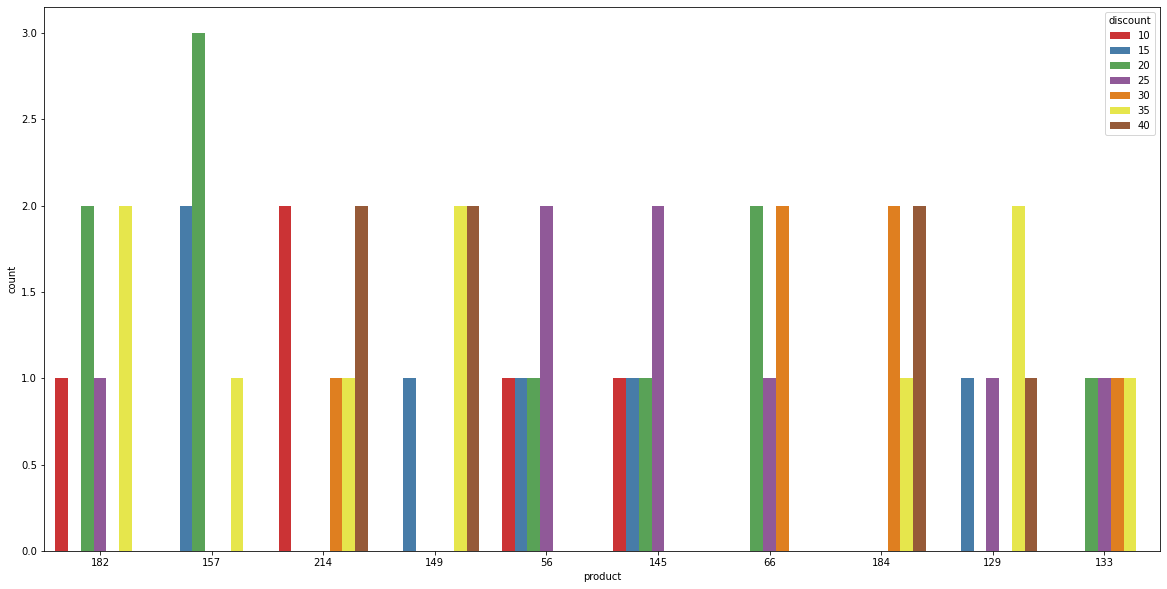

In [20]:
plt.figure(figsize = (20, 10))

sns.countplot(data = df_c, x = 'product', hue = 'discount', order = df_c['product'].value_counts().iloc[:10].index, palette = "Set1")

<AxesSubplot:xlabel='count', ylabel='product'>

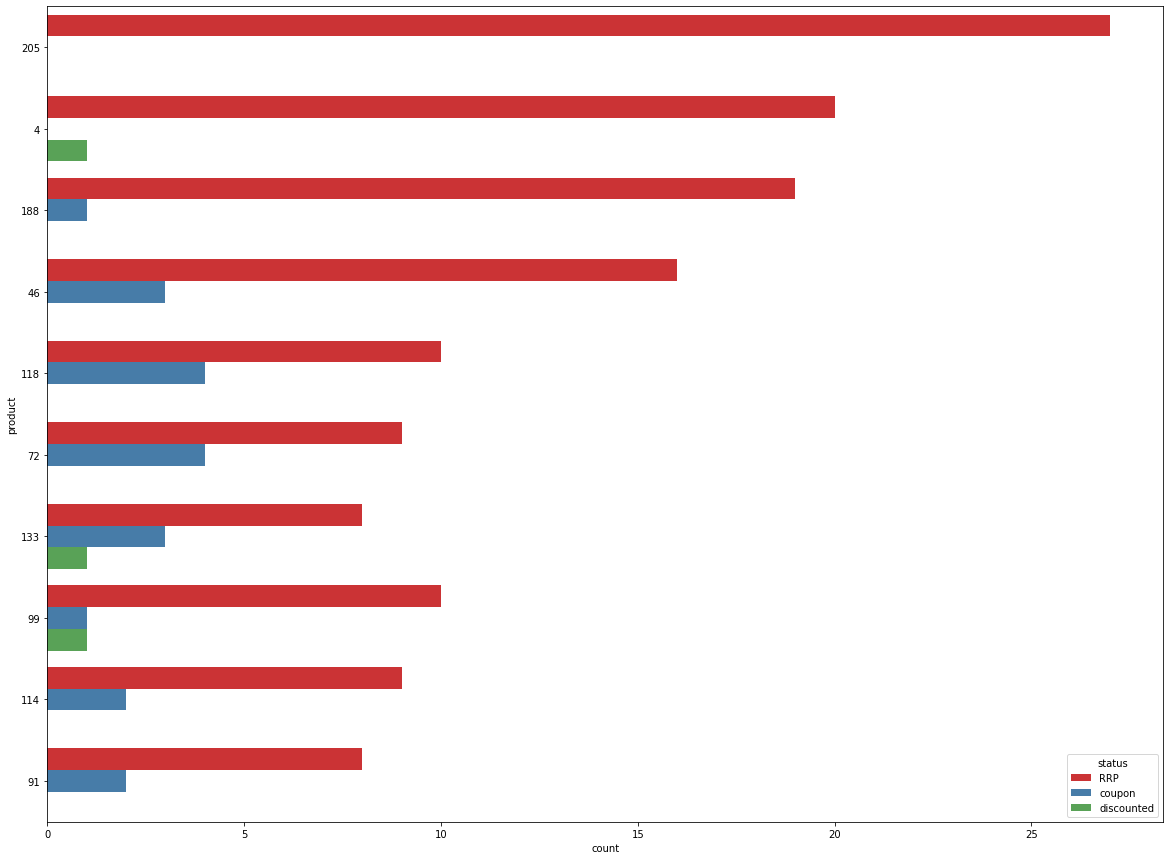

In [24]:
plt.figure(figsize = (20, 15))

sns.countplot(data = full_df, y = 'product', hue = 'status', order = full_df['product'].value_counts().iloc[10:20].index, palette = "Set1")

<AxesSubplot:xlabel='count', ylabel='status'>

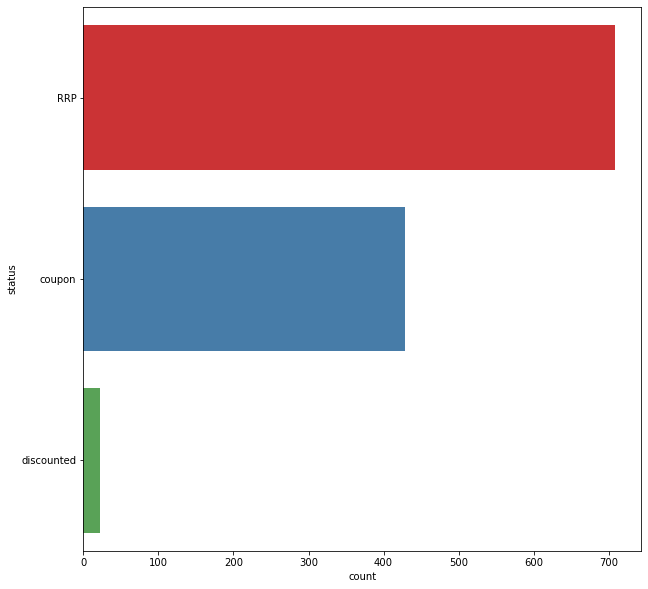

In [25]:
plt.figure(figsize = (10, 10))

sns.countplot(data = full_df, y = 'status', palette = "Set1")